In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
sns.set_context('poster')
sns.set_palette('colorblind')

In [2]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
cad = pd.read_csv('../data/cadmium.csv', index_col=0)

In [3]:
d02sreal = cad.d02*ati.dnu
d02s = np.linspace(d02sreal.min(), d02sreal.max(), 1000)
mhzlim = u.Quantity(d02s/2, u.microhertz)
protlimfast = (1/mhzlim).to(u.day)

2.627666753301071
8.809392636668147 d


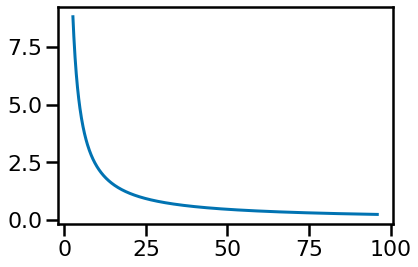

In [4]:
print(d02s.min())
print(protlimfast[np.argmin(d02s)])
plt.plot(d02s, protlimfast)

In [5]:
bl = pd.read_csv('../code/scripts/baselines.csv', index_col=0)
ati = pd.merge(ati, bl, on='KIC')

In [38]:
baseline = np.linspace(ati.bl.min(), ati.bl.max())
fs = (1/u.Quantity(baseline, u.year)).to(u.microhertz)
nuslim = 2*fs
protlimslow = (1/nuslim).to(u.day)

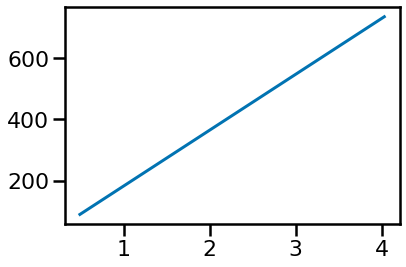

In [39]:
plt.plot(baseline, protlimslow)

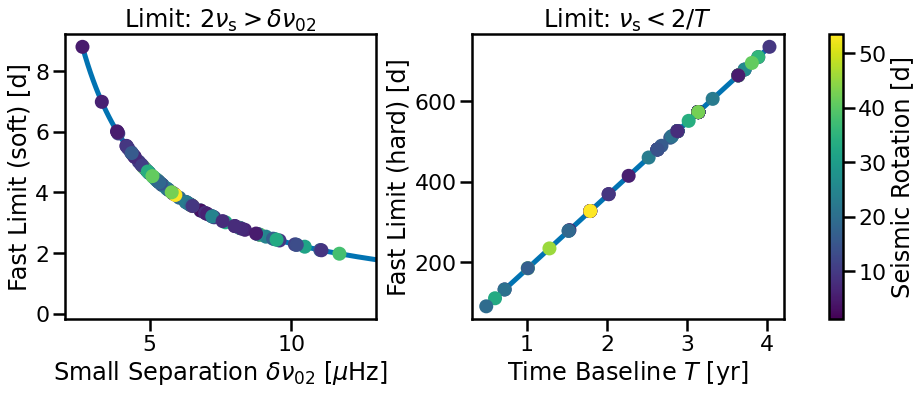

In [40]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))
ax1 = axes[0]
ax1.set_xlabel(r'Small Separation $\delta\nu_{02}$ [$\mu \rm{Hz}$]')
ax1.set_ylabel('Fast Limit (soft) [d]')

ax1.plot(d02s, protlimfast, lw=5)
realprotlimfast = (1/u.Quantity(d02sreal/2, u.microhertz)).to(u.day)
ax1.scatter(d02sreal, realprotlimfast, c = ati.P, zorder=10)
ax1.set_xlim(2, 13)
ax1.set_title(r'Limit: $2\nu_{\rm s} > \delta\nu_{02}$')

ax2 = axes[1]
ax2.set_xlabel(r'Time Baseline $T$ [yr]')
ax2.set_ylabel('Fast Limit (hard) [d]')

ax2.plot(baseline, protlimslow, lw=5)
realprotlimslow = (1/(2*(1/u.Quantity(ati.bl, u.year)).to(u.microhertz))).to(u.day)
c = ax2.scatter(ati.bl, realprotlimslow, c = ati.P, zorder=10)
ax2.set_title(r'Limit: $\nu_{\rm s} < 2/T$')

fig.tight_layout()
fig.colorbar(c, ax=axes, label='Seismic Rotation [d]')